# BCG Virtual Internship - Task 3: Feature Engineering

## Done By: Soorya Parthiban
LinkedIn: https://www.linkedin.com/in/sooryaprakashparthiban/

### Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
#Importing the dataset from previous task which was saved using pickle 
customer_df = pd.read_csv('BCG-Customer.csv')

In [4]:
customer_df.head()

,Unnamed: 0,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [5]:
customer_df.tail()

,Unnamed: 0,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
192997,192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,apdekpcbwosbxepsfxclislboipuxpop,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
192998,192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,apdekpcbwosbxepsfxclislboipuxpop,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
192999,192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,apdekpcbwosbxepsfxclislboipuxpop,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
193000,193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,apdekpcbwosbxepsfxclislboipuxpop,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
193001,193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,apdekpcbwosbxepsfxclislboipuxpop,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0


In [7]:
customer_df.isnull().sum()

Unnamed: 0                  0
id                          0
price_date                  0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
activity_new                0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_first_activ            0
date_modif_prod             0
date_renewal                0
forecast_base_bill_ele      0
forecast_base_bill_year     0
forecast_bill_12m           0
forecast_cons               0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                193002 non-null  int64  
 1   id                        193002 non-null  object 
 2   price_date                193002 non-null  object 
 3   price_p1_var              193002 non-null  float64
 4   price_p2_var              193002 non-null  float64
 5   price_p3_var              193002 non-null  float64
 6   price_p1_fix              193002 non-null  float64
 7   price_p2_fix              193002 non-null  float64
 8   price_p3_fix              193002 non-null  float64
 9   activity_new              193002 non-null  object 
 10  channel_sales             193002 non-null  object 
 11  cons_12m                  193002 non-null  int64  
 12  cons_gas_12m              193002 non-null  int64  
 13  cons_last_month           193002 non-null  i

In [9]:
customer_df.describe()

,Unnamed: 0,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,cons_12m,cons_gas_12m,cons_last_month,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,1.930020e+05,1.930020e+05,1.930020e+05,...,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,96500.500000,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436,1.948834e+05,3.190718e+04,1.947086e+04,...,0.052945,43.533283,196.150372,22.464032,21.463430,1.347800,217.965424,5.031134,20.603921,0.099009
std,55715.022664,0.025029,0.049857,0.036207,5.418773,12.810704,7.754831,6.796728e+05,1.775814e+05,8.238021e+04,...,0.048427,5.191903,494.497370,23.691767,27.907831,1.460228,366.644456,1.676171,21.773156,0.298675
min,0.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,-1.252760e+05,-3.037000e+03,-9.138600e+04,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,48250.250000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,5.908000e+03,0.000000e+00,0.000000e+00,...,0.000000,40.606701,0.000000,12.030000,11.950000,1.000000,52.010000,4.000000,12.500000,0.000000
50%,96500.500000,0.145859,0.085100,0.000000,44.266930,0.000000,0.000000,1.533200e+04,0.000000e+00,9.010000e+02,...,0.085803,44.311378,44.510000,21.090000,21.000000,1.000000,119.880000,5.000000,13.856000,0.000000
75%,144750.750000,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389,5.022000e+04,0.000000e+00,4.127000e+03,...,0.098837,44.311378,218.070000,29.640000,29.640000,1.000000,275.490000,6.000000,19.800000,0.000000
max,193001.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.609711e+07,4.188440e+06,4.538720e+06,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


### Choosing the dependent variables

In [16]:
customer_df.columns

Index(['Unnamed: 0', 'id', 'price_date', 'price_p1_var', 'price_p2_var',
       'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix',
       'activity_new', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_first_activ',
       'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [18]:
dependent_vars = ['id', 'price_p1_var', 'price_p2_var',
       'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix',
        'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn']

In [20]:
customer_df[dependent_vars].head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,channel_sales,cons_12m,cons_gas_12m,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,13.2,0
1,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,13.2,0
2,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,13.2,0
3,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,13.2,0
4,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,...,44.311378,f,91.82,21.52,21.52,1,52.53,3,13.2,0


In [22]:
customer_df[dependent_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   price_p1_var              193002 non-null  float64
 2   price_p2_var              193002 non-null  float64
 3   price_p3_var              193002 non-null  float64
 4   price_p1_fix              193002 non-null  float64
 5   price_p2_fix              193002 non-null  float64
 6   price_p3_fix              193002 non-null  float64
 7   channel_sales             193002 non-null  object 
 8   cons_12m                  193002 non-null  int64  
 9   cons_gas_12m              193002 non-null  int64  
 10  cons_last_month           193002 non-null  int64  
 11  forecast_base_bill_ele    193002 non-null  float64
 12  forecast_base_bill_year   193002 non-null  float64
 13  forecast_bill_12m         193002 non-null  f

In [24]:
customer_df[dependent_vars].select_dtypes(include='object').columns

Index(['id', 'channel_sales', 'has_gas'], dtype='object')

#### Converting the Categorical Variables to Numerical Variables 

In [28]:
dummies_channel_sales = pd.get_dummies(customer_df['channel_sales'], prefix="ChSales", prefix_sep="_")

In [29]:
dummies_channel_sales[1:5]

,ChSales_epumfxlbckeskwekxbiuasklxalciiuu,ChSales_ewpakwlliwisiwduibdlfmalxowmwpci,ChSales_fixdbufsefwooaasfcxdxadsiekoceaa,ChSales_foosdfpfkusacimwkcsosbicdxkicaua,ChSales_lmkebamcaaclubfxadlmueccxoimlema,ChSales_sddiedcslfslkckwlfkdpoeeailfpeds,ChSales_usilxuppasemubllopkaafesmlibmsdf
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [30]:
customer_df.drop('channel_sales', axis=1, inplace=True)

In [32]:
customer_df = pd.concat([customer_df, dummies_channel_sales], axis=1)

In [36]:
customer_df["has_gas"].value_counts()

f    157466
t     35536
Name: has_gas, dtype: int64

In [37]:
customer_df["has_gas_"] = np.where(customer_df["has_gas"]=="t", 1, 0)

In [38]:
customer_df["has_gas_"].value_counts()

0    157466
1     35536
Name: has_gas_, dtype: int64

In [39]:
customer_df.drop('has_gas', axis=1, inplace=True)

In [63]:
cust_df = customer_df[['id', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 
       'ChSales_epumfxlbckeskwekxbiuasklxalciiuu',
       'ChSales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'ChSales_fixdbufsefwooaasfcxdxadsiekoceaa',
       'ChSales_foosdfpfkusacimwkcsosbicdxkicaua',
       'ChSales_lmkebamcaaclubfxadlmueccxoimlema',
       'ChSales_sddiedcslfslkckwlfkdpoeeailfpeds',
       'ChSales_usilxuppasemubllopkaafesmlibmsdf', 'has_gas_', 'churn']]

In [64]:
cust_df['price_p1_var'].astype('float64')

0         0.151367
1         0.151367
2         0.151367
3         0.149626
4         0.149626
            ...   
192997    0.119916
192998    0.119916
192999    0.119916
193000    0.119916
193001    0.119916
Name: price_p1_var, Length: 193002, dtype: float64

In [65]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 37 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        193002 non-null  object 
 1   price_p1_var                              193002 non-null  float64
 2   price_p2_var                              193002 non-null  float64
 3   price_p3_var                              193002 non-null  float64
 4   price_p1_fix                              193002 non-null  float64
 5   price_p2_fix                              193002 non-null  float64
 6   price_p3_fix                              193002 non-null  float64
 7   cons_12m                                  193002 non-null  int64  
 8   cons_gas_12m                              193002 non-null  int64  
 9   cons_last_month                           193002 non-null  int64  
 10  forecast_base_bill_e

### Choosing features based on ANOVA F-value 

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif

In [68]:
X = cust_df.drop(['id', 'churn'], axis=1)
y = cust_df['churn']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135101 entries, 138334 to 15725
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   price_p1_var                              135101 non-null  float64
 1   price_p2_var                              135101 non-null  float64
 2   price_p3_var                              135101 non-null  float64
 3   price_p1_fix                              135101 non-null  float64
 4   price_p2_fix                              135101 non-null  float64
 5   price_p3_fix                              135101 non-null  float64
 6   cons_12m                                  135101 non-null  int64  
 7   cons_gas_12m                              135101 non-null  int64  
 8   cons_last_month                           135101 non-null  int64  
 9   forecast_base_bill_ele                    135101 non-null  float64
 10  forecast_base_bi

In [71]:
print(X_train.shape, X_test.shape)

(135101, 35) (57901, 35)


In [73]:
X_train.isnull().sum()

price_p1_var                                0
price_p2_var                                0
price_p3_var                                0
price_p1_fix                                0
price_p2_fix                                0
price_p3_fix                                0
cons_12m                                    0
cons_gas_12m                                0
cons_last_month                             0
forecast_base_bill_ele                      0
forecast_base_bill_year                     0
forecast_bill_12m                           0
forecast_cons                               0
forecast_cons_12m                           0
forecast_cons_year                          0
forecast_discount_energy                    0
forecast_meter_rent_12m                     0
forecast_price_energy_p1                    0
forecast_price_energy_p2                    0
forecast_price_pow_p1                       0
imp_cons                                    0
margin_gross_pow_ele              

In [137]:
features_scores_fclassif, pval = f_classif(X_train, y_train)

In [138]:
FClassif_Score = pd.Series(features_scores_fclassif)

In [139]:
FClassif_Score.index = X_train.columns

In [143]:
print(FClassif_Score.sort_values(ascending=False))

margin_gross_pow_ele                        855.697853
num_years_antig                             643.658327
margin_net_pow_ele                          538.562031
ChSales_lmkebamcaaclubfxadlmueccxoimlema    414.230581
cons_12m                                    374.799712
cons_last_month                             309.988520
ChSales_foosdfpfkusacimwkcsosbicdxkicaua    272.191899
cons_gas_12m                                236.887729
price_p3_fix                                217.408346
price_p3_var                                203.676482
price_p2_fix                                156.271798
has_gas_                                    139.077778
forecast_meter_rent_12m                     120.415051
net_margin                                  117.313521
forecast_price_energy_p2                     87.195311
price_p2_var                                 77.342082
nb_prod_act                                  65.687817
forecast_discount_energy                     26.831387
ChSales_ew

In [152]:
print("Picking Features with 10+ Scores: \n")

print(FClassif_Score.sort_values(ascending=False)[0:21])

Picking Features with 10+ Scores: 

margin_gross_pow_ele                        855.697853
num_years_antig                             643.658327
margin_net_pow_ele                          538.562031
ChSales_lmkebamcaaclubfxadlmueccxoimlema    414.230581
cons_12m                                    374.799712
cons_last_month                             309.988520
ChSales_foosdfpfkusacimwkcsosbicdxkicaua    272.191899
cons_gas_12m                                236.887729
price_p3_fix                                217.408346
price_p3_var                                203.676482
price_p2_fix                                156.271798
has_gas_                                    139.077778
forecast_meter_rent_12m                     120.415051
net_margin                                  117.313521
forecast_price_energy_p2                     87.195311
price_p2_var                                 77.342082
nb_prod_act                                  65.687817
forecast_discount_energy     

In [154]:
print(FClassif_Score.sort_values(ascending=False)[0:21].index)

Index(['margin_gross_pow_ele', 'num_years_antig', 'margin_net_pow_ele',
       'ChSales_lmkebamcaaclubfxadlmueccxoimlema', 'cons_12m',
       'cons_last_month', 'ChSales_foosdfpfkusacimwkcsosbicdxkicaua',
       'cons_gas_12m', 'price_p3_fix', 'price_p3_var', 'price_p2_fix',
       'has_gas_', 'forecast_meter_rent_12m', 'net_margin',
       'forecast_price_energy_p2', 'price_p2_var', 'nb_prod_act',
       'forecast_discount_energy', 'ChSales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'pow_max', 'ChSales_sddiedcslfslkckwlfkdpoeeailfpeds'],
      dtype='object')


In [189]:
cust_df_v2 = cust_df[['margin_gross_pow_ele', 'num_years_antig', 'margin_net_pow_ele',
       'ChSales_lmkebamcaaclubfxadlmueccxoimlema', 'cons_12m',
       'cons_last_month', 'ChSales_foosdfpfkusacimwkcsosbicdxkicaua',
       'cons_gas_12m', 'price_p3_fix', 'price_p3_var', 'price_p2_fix',
       'has_gas_', 'forecast_meter_rent_12m', 'net_margin',
       'forecast_price_energy_p2', 'price_p2_var', 'nb_prod_act',
       'forecast_discount_energy', 'ChSales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'pow_max', 'ChSales_sddiedcslfslkckwlfkdpoeeailfpeds', 'churn']]

Text(0.5, 1.0, 'Correlation Heatmap of Top Features')

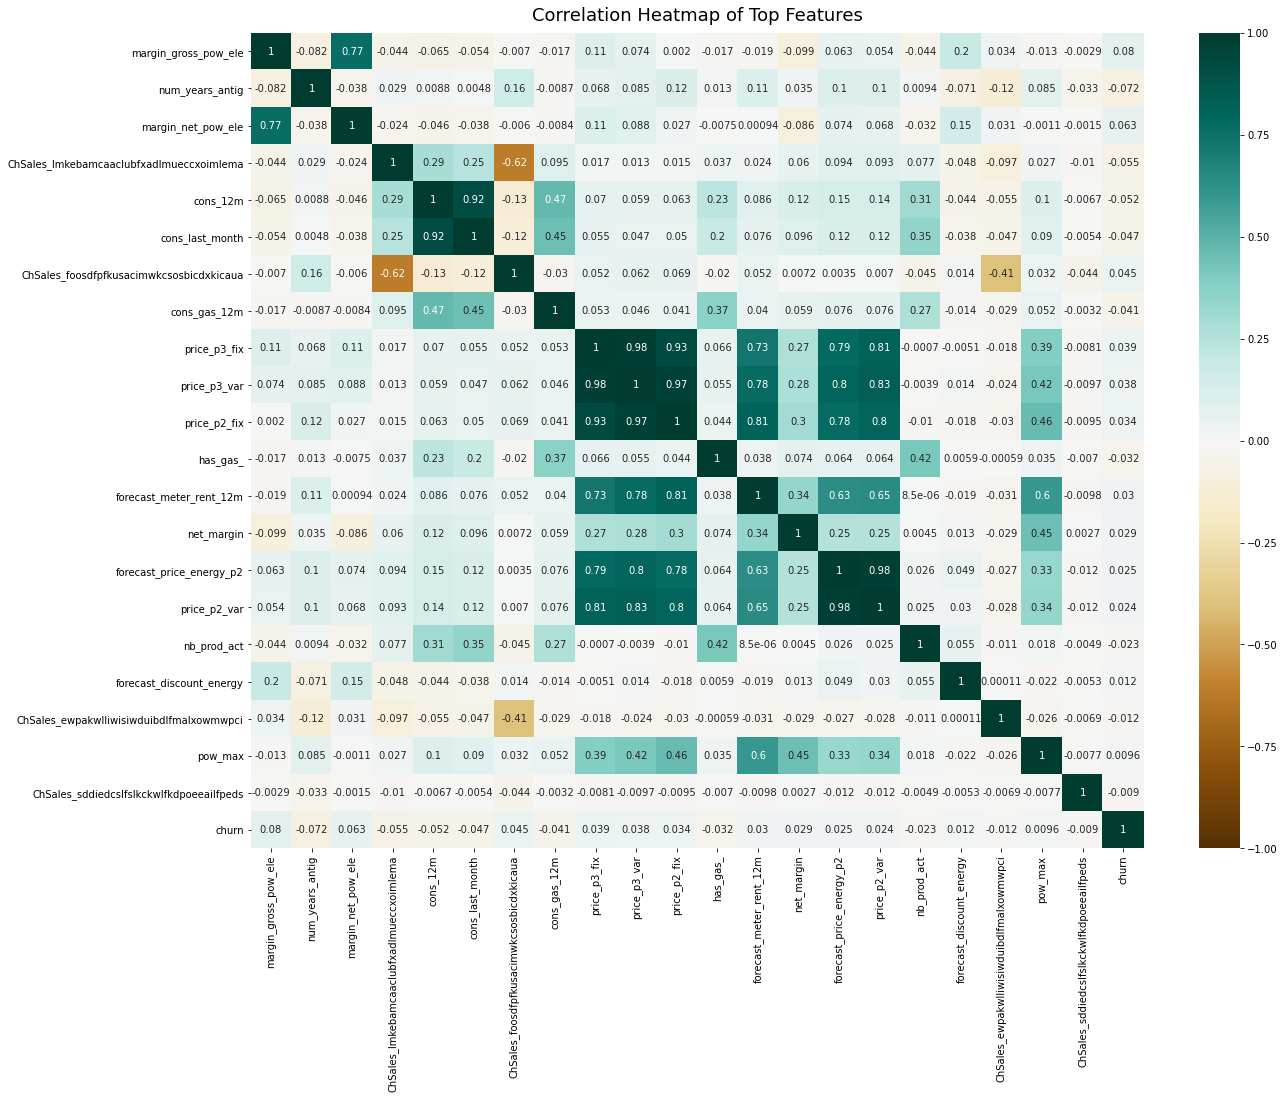

In [190]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(cust_df_v2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of Top Features', fontdict={'fontsize':18}, pad=12)

### Checking the feature importance using Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier()

In [161]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [182]:
rfc_FeatureScores = pd.Series(rfc.feature_importances_)

In [184]:
rfc_FeatureScores.index = X_train.columns

In [186]:
print(rfc_FeatureScores.sort_values(ascending=False))

cons_12m                                    0.087371
net_margin                                  0.081889
forecast_meter_rent_12m                     0.079103
forecast_cons_12m                           0.078866
margin_gross_pow_ele                        0.069998
margin_net_pow_ele                          0.068715
cons_last_month                             0.061282
forecast_price_energy_p1                    0.055039
pow_max                                     0.052999
forecast_cons_year                          0.046978
imp_cons                                    0.046693
forecast_price_energy_p2                    0.029918
num_years_antig                             0.028954
forecast_bill_12m                           0.025567
price_p1_var                                0.021745
cons_gas_12m                                0.018782
forecast_price_pow_p1                       0.015536
forecast_cons                               0.014524
forecast_base_bill_year                     0.

In [196]:
rfc.score(X_test, y_test)

0.9999309165644807

### Saving the dataset with best features

In [192]:
cust_df_v2 = pd.concat([cust_df['id'], cust_df_v2], axis=1)

In [193]:
cust_df_v2.head()

,id,margin_gross_pow_ele,num_years_antig,margin_net_pow_ele,ChSales_lmkebamcaaclubfxadlmueccxoimlema,cons_12m,cons_last_month,ChSales_foosdfpfkusacimwkcsosbicdxkicaua,cons_gas_12m,price_p3_fix,...,forecast_meter_rent_12m,net_margin,forecast_price_energy_p2,price_p2_var,nb_prod_act,forecast_discount_energy,ChSales_ewpakwlliwisiwduibdlfmalxowmwpci,pow_max,ChSales_sddiedcslfslkckwlfkdpoeeailfpeds,churn
0,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
1,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
2,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
3,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0
4,038af19179925da21a25619c5a24b745,21.52,3,21.52,0,3576,630,1,0,0.0,...,19.59,52.53,0.0,0.0,1,0.0,0,13.2,0,0


In [194]:
cust_df_v2.isnull().sum()

id                                          0
margin_gross_pow_ele                        0
num_years_antig                             0
margin_net_pow_ele                          0
ChSales_lmkebamcaaclubfxadlmueccxoimlema    0
cons_12m                                    0
cons_last_month                             0
ChSales_foosdfpfkusacimwkcsosbicdxkicaua    0
cons_gas_12m                                0
price_p3_fix                                0
price_p3_var                                0
price_p2_fix                                0
has_gas_                                    0
forecast_meter_rent_12m                     0
net_margin                                  0
forecast_price_energy_p2                    0
price_p2_var                                0
nb_prod_act                                 0
forecast_discount_energy                    0
ChSales_ewpakwlliwisiwduibdlfmalxowmwpci    0
pow_max                                     0
ChSales_sddiedcslfslkckwlfkdpoeeai

In [195]:
cust_df_v2.to_csv('BCG-Customer-BestFeatures.csv')

# ~ THE END